In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
df=pd.read_csv('risk_factors_cervical_cancer_cleaned.csv')

Data from 'Age' column has normal distribution

In [3]:
mean = np.mean(df['Age'])

In [4]:
std = np.std(df['Age'])

In [5]:
samples = np.random.normal(mean, std, size = 858)

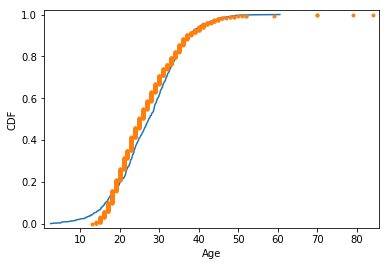

In [7]:
def ecdf(data):
    n=len(data)
    x= np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

x_theor, y_theor = ecdf(samples)
x, y = ecdf(df['Age'])

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Age')
_ = plt.ylabel('CDF')
plt.show()


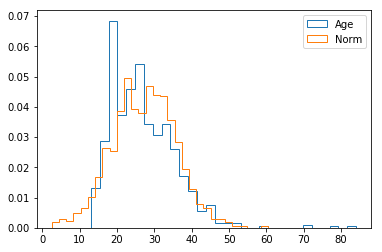

In [9]:
#histograms
plt.hist(df['Age'], bins=30, normed=True, histtype='step', label='Age')
plt.hist(samples, bins=30, normed=True, histtype='step', label='Norm')
plt.legend()
plt.show()

Compute Pearson correlation coefficient between 'Age' and 'Biopsy'

In [12]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

corr_coef_age_biopsy = pearson_r(df['Age'], df['Biopsy'])

In [33]:
corr_coef_age_biopsy

0.055955515093329862

Plotting 'Hormonal Contraceptives (years)' versus 'STDs (number)'

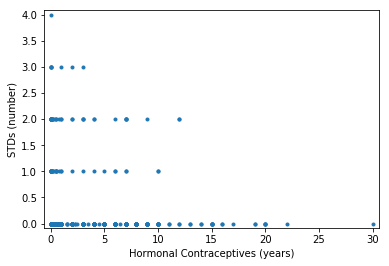

In [34]:
# Plot the 'Hormonal Contraceptives (years) versus 'STDs (number)'
_ = plt.plot(df['Hormonal Contraceptives (years)'], df['STDs (number)'], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Hormonal Contraceptives (years)')
_ = plt.ylabel('STDs (number)')

# Draw the plot
plt.show()


Generating bootstrap samples for 'Age' column and comparing bootstrap ECDF with original data ECDF

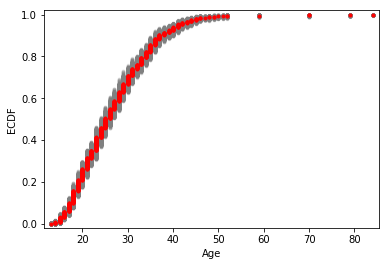

In [36]:
for _ in range(500):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(df['Age'], size=len(df['Age']))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)
# Compute and plot ECDF from original data
x, y = ecdf(df['Age'])
_ = plt.plot(x, y, marker='.', linestyle='none', color='red')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Age')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()


95% confidence interval = [ 26.26803613  27.39863054]


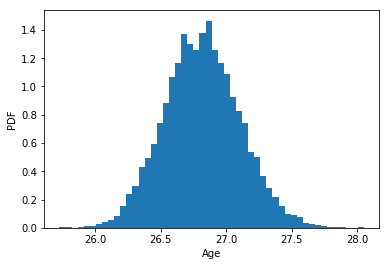

In [39]:
#If we have a data set with N repeated measurements, a bootstrap sample is an array of length N that was drawn 
#from the original data with replacement. 
#A single value of a statistic computed from a bootstrap sample is bootstrap replicate.

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


#A confidence interval gives bounds on the range of parameter values you might expect to get if we repeated
#our measurements. For named distributions, you can compute them analytically or look them up,
#but one of the many beautiful properties of the bootstrap method is that you can just take 
#percentiles of your bootstrap replicates to get your confidence interval. 
#Conveniently, you can use the np.percentile() function.
#Using your bootstrap replicates you just generated to compute the 95% confidence interval. 
#That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates.

# Draw bootstrap replicates of the mean 'Age': bs_replicates
bs_replicates = draw_bs_reps(df['Age'],np.mean,10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int)

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Age')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()
